In [131]:
#ABV – Alcohol By Volume
#Brewing Company
#Food Pairing – Perfect food to have with this beer
#Glassware Used – Perfect glassware to use to enjoy this beer
#Beer Name – Name of the beer
#Ratings
#Score (Predict) – Overall score of the beer
#Style Name – Style in which the beer is prepared
#Cellar Temperature
#Serving Temperature
import os
os.getcwd()
os.chdir("C:/Users/deepa/Desktop/Data Sets")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
beer=pd.read_csv('Beer.csv')
beer=beer.drop(['Brewing Company','Beer Name'],axis=1)
beer

,ABV,Food Paring,Glassware Used,Ratings,Style Name,Cellar Temperature,Serving Temperature,Score
0,6.50,"(Curried,Thai)Cheese(pepperyMontereyPepperJack...","PintGlass(orBecker,Nonic,Tumbler),Mug(orSeidel...",22.0,AmericanIPA,40-45,45-50,3.28
1,5.50,"(PanAsian)Cheese(earthyCamembert,Fontina,nutty...","PintGlass(orBecker,Nonic,Tumbler),Mug(orSeidel...",1.0,AmericanPaleAle(APA),35-40,40-45,3.52
2,8.10,"Meat(Pork,Poultry)","PintGlass(orBecker,Nonic,Tumbler),Mug(orSeidel...",3.0,IrishRedAle,35-40,40-45,4.01
3,NaN,"(Indian,LatinAmerican,PanAsian)General(Aperitif)","PintGlass(orBecker,Nonic,Tumbler),PilsenerGlas...",0.0,AmericanMaltLiquor,35-40,35-40,0.00
4,6.00,"Meat(Poultry,Fish,Shellfish)",PilsenerGlass(orPokal),1.0,EuroPaleLager,35-40,40-45,2.73
5,7.40,"(Italian,German)Cheese(nuttyAsiago,Colby,Parme...","Flute,PilsenerGlass(orPokal),Mug(orSeidel,Stein)",1.0,MaibockHellesBock,40-45,45-50,3.86
6,3.00,"Cheese(earthyCamembert,Fontina,nuttyAsiago,Col...","PintGlass(orBecker,Nonic,Tumbler),Mug(orSeidel...",15.0,EnglishBrownAle,40-45,45-50,3.77
7,5.50,"(Curried,Thai)Cheese(pepperyMontereyPepperJack...","PintGlass(orBecker,Nonic,Tumbler),Mug(orSeidel...",6.0,AmericanIPA,40-45,45-50,3.67
8,6.50,"(Curried,Thai)Cheese(pepperyMontereyPepperJack...","PintGlass(orBecker,Nonic,Tumbler),Mug(orSeidel...",4.0,AmericanIPA,40-45,45-50,3.97
9,11.30,"Cheese(butteryBrie,Gouda,Havarti,Swiss)General...","PintGlass(orBecker,Nonic,Tumbler),Snifter,Over...",12.0,AmericanDoubleImperialStout,45-50,50-55,4.24


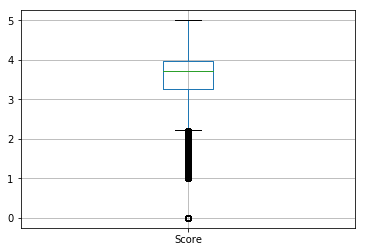

In [132]:
beer.boxplot(column='Score')

In [133]:
#Find the number of missing values
beer.apply(lambda x: sum(x.isnull()),axis=0)

ABV                    15130
Food Paring                0
Glassware Used             0
Ratings                    0
Style Name                 0
Cellar Temperature      6781
Serving Temperature      193
Score                      0
dtype: int64

In [134]:
#To fill in missing values of ABV, find the mean of ABV and replace all missing values with mean
ABV_mean=beer['ABV'].mean()
ABV_mean

6.354960736131254

In [135]:
beer['ABV'].fillna(ABV_mean,inplace=True)

In [136]:
#Fill in missing values of cellar temp and serving temp with most repeatitions
beer.apply(lambda x: sum(x.isnull()),axis=0)

ABV                       0
Food Paring               0
Glassware Used            0
Ratings                   0
Style Name                0
Cellar Temperature     6781
Serving Temperature     193
Score                     0
dtype: int64

In [137]:
beer['Cellar Temperature'].value_counts()

40-45    95108
35-40    48049
45-50    35705
Name: Cellar Temperature, dtype: int64

In [138]:
beer['Serving Temperature'].value_counts()

45-50    113380
40-45     46670
50-55     24089
35-40      1311
Name: Serving Temperature, dtype: int64

In [139]:
beer['Cellar Temperature'].fillna("40-45",inplace=True)
beer['Serving Temperature'].fillna("40-45",inplace=True)
beer['Cellar Temperature'].value_counts()

40-45    101889
35-40     48049
45-50     35705
Name: Cellar Temperature, dtype: int64

In [140]:
beer

,ABV,Food Paring,Glassware Used,Ratings,Style Name,Cellar Temperature,Serving Temperature,Score
0,6.500000,"(Curried,Thai)Cheese(pepperyMontereyPepperJack...","PintGlass(orBecker,Nonic,Tumbler),Mug(orSeidel...",22.0,AmericanIPA,40-45,45-50,3.28
1,5.500000,"(PanAsian)Cheese(earthyCamembert,Fontina,nutty...","PintGlass(orBecker,Nonic,Tumbler),Mug(orSeidel...",1.0,AmericanPaleAle(APA),35-40,40-45,3.52
2,8.100000,"Meat(Pork,Poultry)","PintGlass(orBecker,Nonic,Tumbler),Mug(orSeidel...",3.0,IrishRedAle,35-40,40-45,4.01
3,6.354961,"(Indian,LatinAmerican,PanAsian)General(Aperitif)","PintGlass(orBecker,Nonic,Tumbler),PilsenerGlas...",0.0,AmericanMaltLiquor,35-40,35-40,0.00
4,6.000000,"Meat(Poultry,Fish,Shellfish)",PilsenerGlass(orPokal),1.0,EuroPaleLager,35-40,40-45,2.73
5,7.400000,"(Italian,German)Cheese(nuttyAsiago,Colby,Parme...","Flute,PilsenerGlass(orPokal),Mug(orSeidel,Stein)",1.0,MaibockHellesBock,40-45,45-50,3.86
6,3.000000,"Cheese(earthyCamembert,Fontina,nuttyAsiago,Col...","PintGlass(orBecker,Nonic,Tumbler),Mug(orSeidel...",15.0,EnglishBrownAle,40-45,45-50,3.77
7,5.500000,"(Curried,Thai)Cheese(pepperyMontereyPepperJack...","PintGlass(orBecker,Nonic,Tumbler),Mug(orSeidel...",6.0,AmericanIPA,40-45,45-50,3.67
8,6.500000,"(Curried,Thai)Cheese(pepperyMontereyPepperJack...","PintGlass(orBecker,Nonic,Tumbler),Mug(orSeidel...",4.0,AmericanIPA,40-45,45-50,3.97
9,11.300000,"Cheese(butteryBrie,Gouda,Havarti,Swiss)General...","PintGlass(orBecker,Nonic,Tumbler),Snifter,Over...",12.0,AmericanDoubleImperialStout,45-50,50-55,4.24


In [141]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
beer['Cellar Temperature'].replace(['45-50','40-45','35-40'],['2','1','0'],inplace=True)
beer['Serving Temperature'].replace(['50-55','45-50','40-45','35-40'],['3','2','1','0'],inplace=True)
beer

,ABV,Food Paring,Glassware Used,Ratings,Style Name,Cellar Temperature,Serving Temperature,Score
0,6.500000,"(Curried,Thai)Cheese(pepperyMontereyPepperJack...","PintGlass(orBecker,Nonic,Tumbler),Mug(orSeidel...",22.0,AmericanIPA,1,2,3.28
1,5.500000,"(PanAsian)Cheese(earthyCamembert,Fontina,nutty...","PintGlass(orBecker,Nonic,Tumbler),Mug(orSeidel...",1.0,AmericanPaleAle(APA),0,1,3.52
2,8.100000,"Meat(Pork,Poultry)","PintGlass(orBecker,Nonic,Tumbler),Mug(orSeidel...",3.0,IrishRedAle,0,1,4.01
3,6.354961,"(Indian,LatinAmerican,PanAsian)General(Aperitif)","PintGlass(orBecker,Nonic,Tumbler),PilsenerGlas...",0.0,AmericanMaltLiquor,0,0,0.00
4,6.000000,"Meat(Poultry,Fish,Shellfish)",PilsenerGlass(orPokal),1.0,EuroPaleLager,0,1,2.73
5,7.400000,"(Italian,German)Cheese(nuttyAsiago,Colby,Parme...","Flute,PilsenerGlass(orPokal),Mug(orSeidel,Stein)",1.0,MaibockHellesBock,1,2,3.86
6,3.000000,"Cheese(earthyCamembert,Fontina,nuttyAsiago,Col...","PintGlass(orBecker,Nonic,Tumbler),Mug(orSeidel...",15.0,EnglishBrownAle,1,2,3.77
7,5.500000,"(Curried,Thai)Cheese(pepperyMontereyPepperJack...","PintGlass(orBecker,Nonic,Tumbler),Mug(orSeidel...",6.0,AmericanIPA,1,2,3.67
8,6.500000,"(Curried,Thai)Cheese(pepperyMontereyPepperJack...","PintGlass(orBecker,Nonic,Tumbler),Mug(orSeidel...",4.0,AmericanIPA,1,2,3.97
9,11.300000,"Cheese(butteryBrie,Gouda,Havarti,Swiss)General...","PintGlass(orBecker,Nonic,Tumbler),Snifter,Over...",12.0,AmericanDoubleImperialStout,2,3,4.24


In [142]:
x=beer.iloc[:,:-1].values
y=beer.iloc[:,7].values
x

array([[6.5,
        '(Curried,Thai)Cheese(pepperyMontereyPepperJack,sharpBlue,Cheddar,pungentGorgonzola,Limburger)Meat(Poultry,Fish,Shellfish,Salmon)',
        'PintGlass(orBecker,Nonic,Tumbler),Mug(orSeidel,Stein)', ...,
        'AmericanIPA', '1', '2'],
       [5.5,
        '(PanAsian)Cheese(earthyCamembert,Fontina,nuttyAsiago,Colby,Parmesan,tangyBrick,Edam,Feta)General(Salad)Meat(Poultry)',
        'PintGlass(orBecker,Nonic,Tumbler),Mug(orSeidel,Stein)', ...,
        'AmericanPaleAle(APA)', '0', '1'],
       [8.1, 'Meat(Pork,Poultry)',
        'PintGlass(orBecker,Nonic,Tumbler),Mug(orSeidel,Stein)', ...,
        'IrishRedAle', '0', '1'],
       ...,
       [6.354960736131254,
        'Cheese(earthyCamembert,Fontina,nuttyAsiago,Colby,Parmesan)Meat(Pork,GrilledMeat)',
        'PintGlass(orBecker,Nonic,Tumbler),Mug(orSeidel,Stein)', ...,
        'EnglishBrownAle', '1', '2'],
       [6.2,
        '(Curried,Thai)Cheese(pepperyMontereyPepperJack,sharpBlue,Cheddar,pungentGorgonzola,Limbur

In [143]:
beer.describe()

,ABV,Ratings,Score
count,185643.000000,185643.000000,185643.000000
mean,6.354961,32.955210,3.198432
std,1.827834,254.863803,1.358862
min,0.010000,0.000000,0.000000
25%,5.100000,1.000000,3.270000
50%,6.100000,2.000000,3.710000
75%,7.000000,7.000000,3.970000
max,80.000000,16954.000000,5.000000


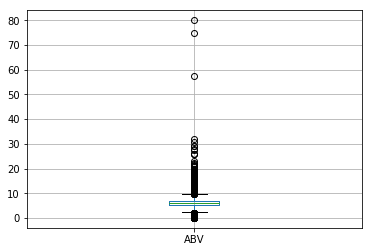

In [144]:
beer.boxplot(column='ABV')

In [145]:
uniq_fp=beer['Food Paring'].nunique()
uniq_gw=beer['Glassware Used'].nunique()
uniq_sn=beer['Style Name'].nunique()

In [146]:
beer

,ABV,Food Paring,Glassware Used,Ratings,Style Name,Cellar Temperature,Serving Temperature,Score
0,6.500000,"(Curried,Thai)Cheese(pepperyMontereyPepperJack...","PintGlass(orBecker,Nonic,Tumbler),Mug(orSeidel...",22.0,AmericanIPA,1,2,3.28
1,5.500000,"(PanAsian)Cheese(earthyCamembert,Fontina,nutty...","PintGlass(orBecker,Nonic,Tumbler),Mug(orSeidel...",1.0,AmericanPaleAle(APA),0,1,3.52
2,8.100000,"Meat(Pork,Poultry)","PintGlass(orBecker,Nonic,Tumbler),Mug(orSeidel...",3.0,IrishRedAle,0,1,4.01
3,6.354961,"(Indian,LatinAmerican,PanAsian)General(Aperitif)","PintGlass(orBecker,Nonic,Tumbler),PilsenerGlas...",0.0,AmericanMaltLiquor,0,0,0.00
4,6.000000,"Meat(Poultry,Fish,Shellfish)",PilsenerGlass(orPokal),1.0,EuroPaleLager,0,1,2.73
5,7.400000,"(Italian,German)Cheese(nuttyAsiago,Colby,Parme...","Flute,PilsenerGlass(orPokal),Mug(orSeidel,Stein)",1.0,MaibockHellesBock,1,2,3.86
6,3.000000,"Cheese(earthyCamembert,Fontina,nuttyAsiago,Col...","PintGlass(orBecker,Nonic,Tumbler),Mug(orSeidel...",15.0,EnglishBrownAle,1,2,3.77
7,5.500000,"(Curried,Thai)Cheese(pepperyMontereyPepperJack...","PintGlass(orBecker,Nonic,Tumbler),Mug(orSeidel...",6.0,AmericanIPA,1,2,3.67
8,6.500000,"(Curried,Thai)Cheese(pepperyMontereyPepperJack...","PintGlass(orBecker,Nonic,Tumbler),Mug(orSeidel...",4.0,AmericanIPA,1,2,3.97
9,11.300000,"Cheese(butteryBrie,Gouda,Havarti,Swiss)General...","PintGlass(orBecker,Nonic,Tumbler),Snifter,Over...",12.0,AmericanDoubleImperialStout,2,3,4.24


In [147]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X_0 = LabelEncoder()
x[:, 1] = labelencoder_X_0.fit_transform(x[:, 1])
labelencoder_X_1 = LabelEncoder()
x[:, 2] = labelencoder_X_1.fit_transform(x[:, 2])
labelencoder_X_2 = LabelEncoder()
x[:, 4] = labelencoder_X_2.fit_transform(x[:, 4])
x

array([[6.5, 26, 18, ..., 12, '1', '2'],
       [5.5, 58, 18, ..., 14, '0', '1'],
       [8.1, 85, 18, ..., 63, '0', '1'],
       ...,
       [6.354960736131254, 71, 18, ..., 43, '1', '2'],
       [6.2, 26, 18, ..., 12, '1', '2'],
       [6.4, 26, 18, ..., 12, '1', '2']], dtype=object)

In [148]:
onehotencoder = OneHotEncoder(categorical_features =[4])
x = onehotencoder.fit_transform(x).toarray()
from sklearn.cross_validation import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=0)
x_train

array([[ 0.,  0.,  0., ...,  5.,  1.,  2.],
       [ 0.,  0.,  0., ..., 13.,  1.,  2.],
       [ 0.,  0.,  0., ...,  2.,  2.,  2.],
       ...,
       [ 0.,  0.,  0., ...,  0.,  1.,  2.],
       [ 0.,  0.,  0., ...,  3.,  1.,  2.],
       [ 0.,  0.,  0., ...,  6.,  1.,  2.]])

In [149]:
beer1=beer.corr()
beer1

,ABV,Ratings,Score
ABV,1.000000,0.053559,0.130498
Ratings,0.053559,1.000000,0.065293
Score,0.130498,0.065293,1.000000


In [ ]:
#High correlation between ABV and Score

In [150]:
import statsmodels.api as sm
model=sm.OLS(beer['ABV'],beer['Score']).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    ABV   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                 7.789e+05
Date:                Thu, 31 May 2018   Prob (F-statistic):               0.00
Time:                        23:34:14   Log-Likelihood:            -4.6114e+05
No. Observations:              185643   AIC:                         9.223e+05
Df Residuals:                  185642   BIC:                         9.223e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Score          1.7099      0.002    882.536      0.000       1.706       1.714
==============================================================================
Omnibus:                    63722.226   Durbin-Watson:                   1.815
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           474185.909
Skew:                           1.457   Prob(JB):                         0.00
Kurtosis:                      10.267   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [151]:
import statsmodels.api as sm
model1=sm.OLS(beer['Ratings'],beer['Score']).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Ratings   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     3895.
Date:                Thu, 31 May 2018   Prob (F-statistic):               0.00
Time:                        23:34:18   Log-Likelihood:            -1.2916e+06
No. Observations:              185643   AIC:                         2.583e+06
Df Residuals:                  185642   BIC:                         2.583e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Score         10.6006      0.170     62.408      0.000      10.268      10.933
==============================================================================
Omnibus:                   439599.872   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       5860703669.725
Skew:                          24.033   Prob(JB):                         0.00
Kurtosis:                     872.117   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [152]:
x_train

array([[ 0.,  0.,  0., ...,  5.,  1.,  2.],
       [ 0.,  0.,  0., ..., 13.,  1.,  2.],
       [ 0.,  0.,  0., ...,  2.,  2.,  2.],
       ...,
       [ 0.,  0.,  0., ...,  0.,  1.,  2.],
       [ 0.,  0.,  0., ...,  3.,  1.,  2.],
       [ 0.,  0.,  0., ...,  6.,  1.,  2.]])

In [174]:
df1=pd.DataFrame(y_train)
df2=pd.DataFrame(x_train)
df2

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.000000,26.0,18.0,5.0,1.0,2.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,5.400000,75.0,8.0,13.0,1.0,2.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,5.800000,25.0,28.0,2.0,2.0,2.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,7.200000,87.0,19.0,6.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,5.000000,14.0,14.0,1.0,0.0,1.0
5,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.100000,87.0,19.0,1.0,0.0,1.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,4.700000,69.0,33.0,2.0,2.0,2.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,5.500000,58.0,18.0,0.0,0.0,1.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,5.300000,50.0,2.0,1.0,1.0,2.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,5.100000,58.0,18.0,1.0,0.0,1.0


In [153]:

x1=sm.OLS(x_train[1],y_train[0]).fit()
x1.summary()
#2,4,5,6

ValueError: unrecognized data structures: <class 'numpy.ndarray'> / <class 'numpy.float64'>

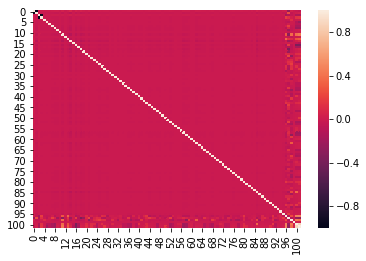

In [112]:
import seaborn as sns
sns.heatmap(pd.DataFrame(x).corr(method='pearson'))

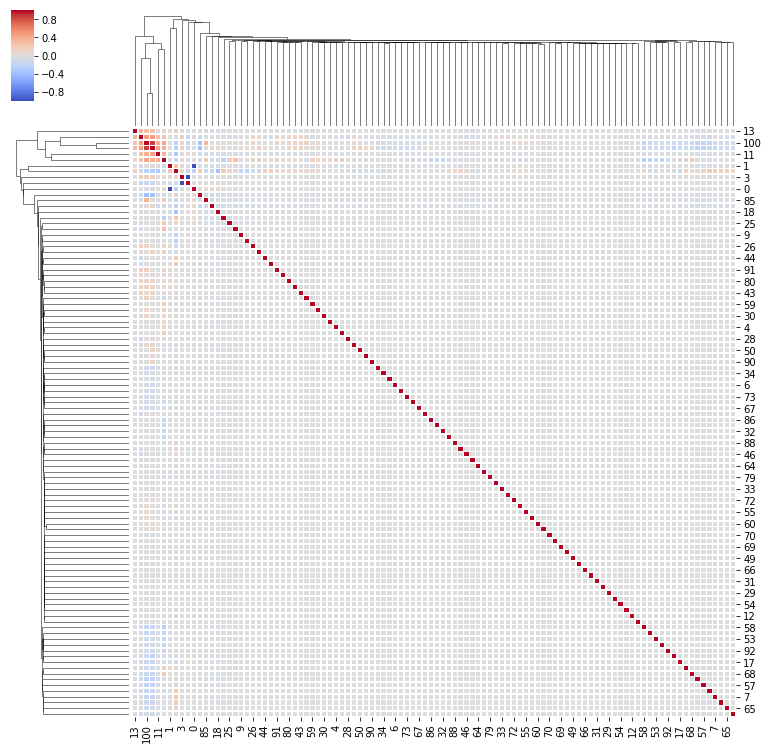

In [113]:
sns.clustermap(pd.DataFrame(x).corr(method='pearson'), center=0,cmap='coolwarm' ,linewidths=.75, figsize=(13, 13))

In [114]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [115]:
y_pred=reg.predict(x_test)
y_pred

array([3.24954224, 3.36940765, 3.19051361, ..., 3.08037949, 3.46943665,
       3.15890121])

In [116]:
y_test

array([3.71, 4.05, 3.32, ..., 3.44, 4.17, 3.77])

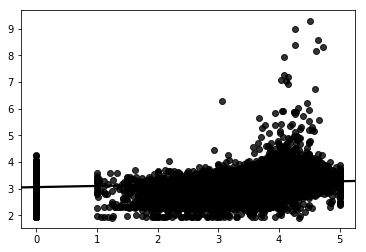

In [117]:
import seaborn
seaborn.regplot(y_test,y_pred,data=None, x_estimator=None, x_bins=None, x_ci='ci', scatter=True, fit_reg=True, ci=95, n_boot=1000, units=None, order=1, logistic=False, lowess=False, robust=False, logx=False, x_partial=None, y_partial=None, truncate=False, dropna=True, x_jitter=None, y_jitter=None, label=None, color='black', marker='o', scatter_kws=None, line_kws=None, ax=None)

In [177]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df

,Actual,Predicted
0,3.71,3.249542
1,4.05,3.369408
2,3.32,3.190514
3,3.77,3.400093
4,4.41,3.621307
5,3.77,3.363182
6,0.00,3.316463
7,4.85,3.230377
8,3.39,2.890331
9,4.55,3.567612
